In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 126 GB / available: 115 GB / percent used: 8.5 %


# GMTED2010 elevation data at different resolutions

GMTED2010 global digital elevation model (cf mail Laurent Fairhead): http://www.temis.nl/data/gmted2010/ 
(https://www.lmd.jussieu.fr/~lmdz/LMDZ_Init/Relief_GMTED2010_15n030_0125deg.nc)

and

http://www.temis.nl/data/gmted2010/

Test with the 2 lightest files:
- /data/mlalande/Relief/Relief_GMTED2010_15n030_0125deg.nc
- /data/mlalande/Relief/GMTED2010_15n030_0125deg.nc

In [3]:
Relief_GMTED2010_15n030_0125deg = xr.open_dataset('/data/mlalande/Relief/Relief_GMTED2010_15n030_0125deg.nc')
Relief_GMTED2010_15n030_0125deg

<xarray.Dataset>
Dimensions:    (latitude: 1440, longitude: 2880)
Coordinates:
  * longitude  (longitude) float32 -179.9375 -179.8125 ... 179.8125 179.9375
  * latitude   (latitude) float32 -89.9375 -89.8125 -89.6875 ... 89.8125 89.9375
Data variables:
    RELIEF     (latitude, longitude) float32 ...

In [2]:
GMTED2010_15n030_0125deg = xr.open_dataset('/data/mlalande/Relief/GMTED2010_15n030_0125deg.nc')
GMTED2010_15n030_0125deg

<xarray.Dataset>
Dimensions:           (nbounds: 2, nlat: 1440, nlon: 2880)
Coordinates:
  * nlat              (nlat) int16 0 1 2 3 4 5 ... 1434 1435 1436 1437 1438 1439
  * nlon              (nlon) int16 0 1 2 3 4 5 ... 2874 2875 2876 2877 2878 2879
  * nbounds           (nbounds) int16 0 1
Data variables:
    latitude          (nlat) float32 ...
    longitude         (nlon) float32 ...
    latitude_bounds   (nlat, nbounds) float32 ...
    longitude_bounds  (nlon, nbounds) float32 ...
    elevation         (nlat, nlon) int16 ...
    elevation_stddev  (nlat, nlon) int16 ...
    elevation_max     (nlat, nlon) int16 ...
    elevation_min     (nlat, nlon) int16 ...
Attributes:
    institution:                KNMI
    Title:                      GMTED2010 elevation data regridded at 0.125 d...
    resolution_degrees:         0.125
    resolution_summing_factor:  30
    input_file:                 S5P_OPER_REF_DEM_15_00000000T000000_99999999T...
    input_correction:           incorrect zero elevation values in the Caspia...
    input_note:                 see "Original_attributes" for a copy of the a...
    history:                    2016-01-11: Conversion from HDF-5 by Maarten ...
    creation_date:              2016-02-29
    gmted2010_citation:         Danielson, J.J., and Gesch, D.B., 2011, Globa...
    gmted2010_viewer_url:       http://topotools.cr.usgs.gov/gmted_viewer/
    gmted2010_citation_url:     http://pubs.usgs.gov/of/2011/1073/pdf/of2011-...

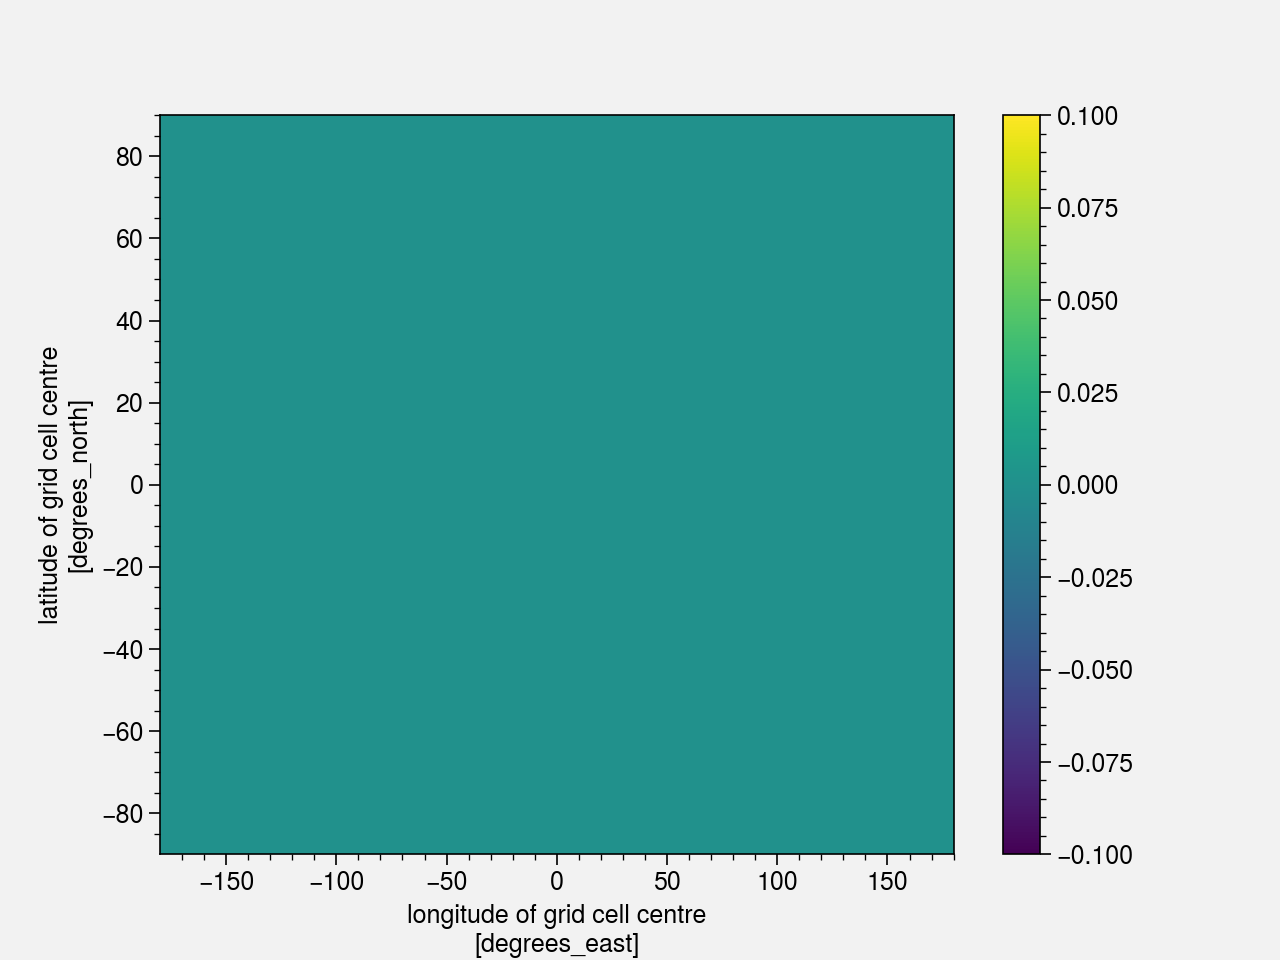

In [13]:
(GMTED2010_15n030_0125deg.drop_dims('nbounds').swap_dims({'nlat': 'latitude', 'nlon': 'longitude'}).elevation - Relief_GMTED2010_15n030_0125deg.RELIEF).plot() 

Ok donc c'est juste un reformatage surement pour que ça fit dans le modèle